Xu Hui provided the exact values for the wavefunctions and eigenvalues. I used the VASP calculated solutions.


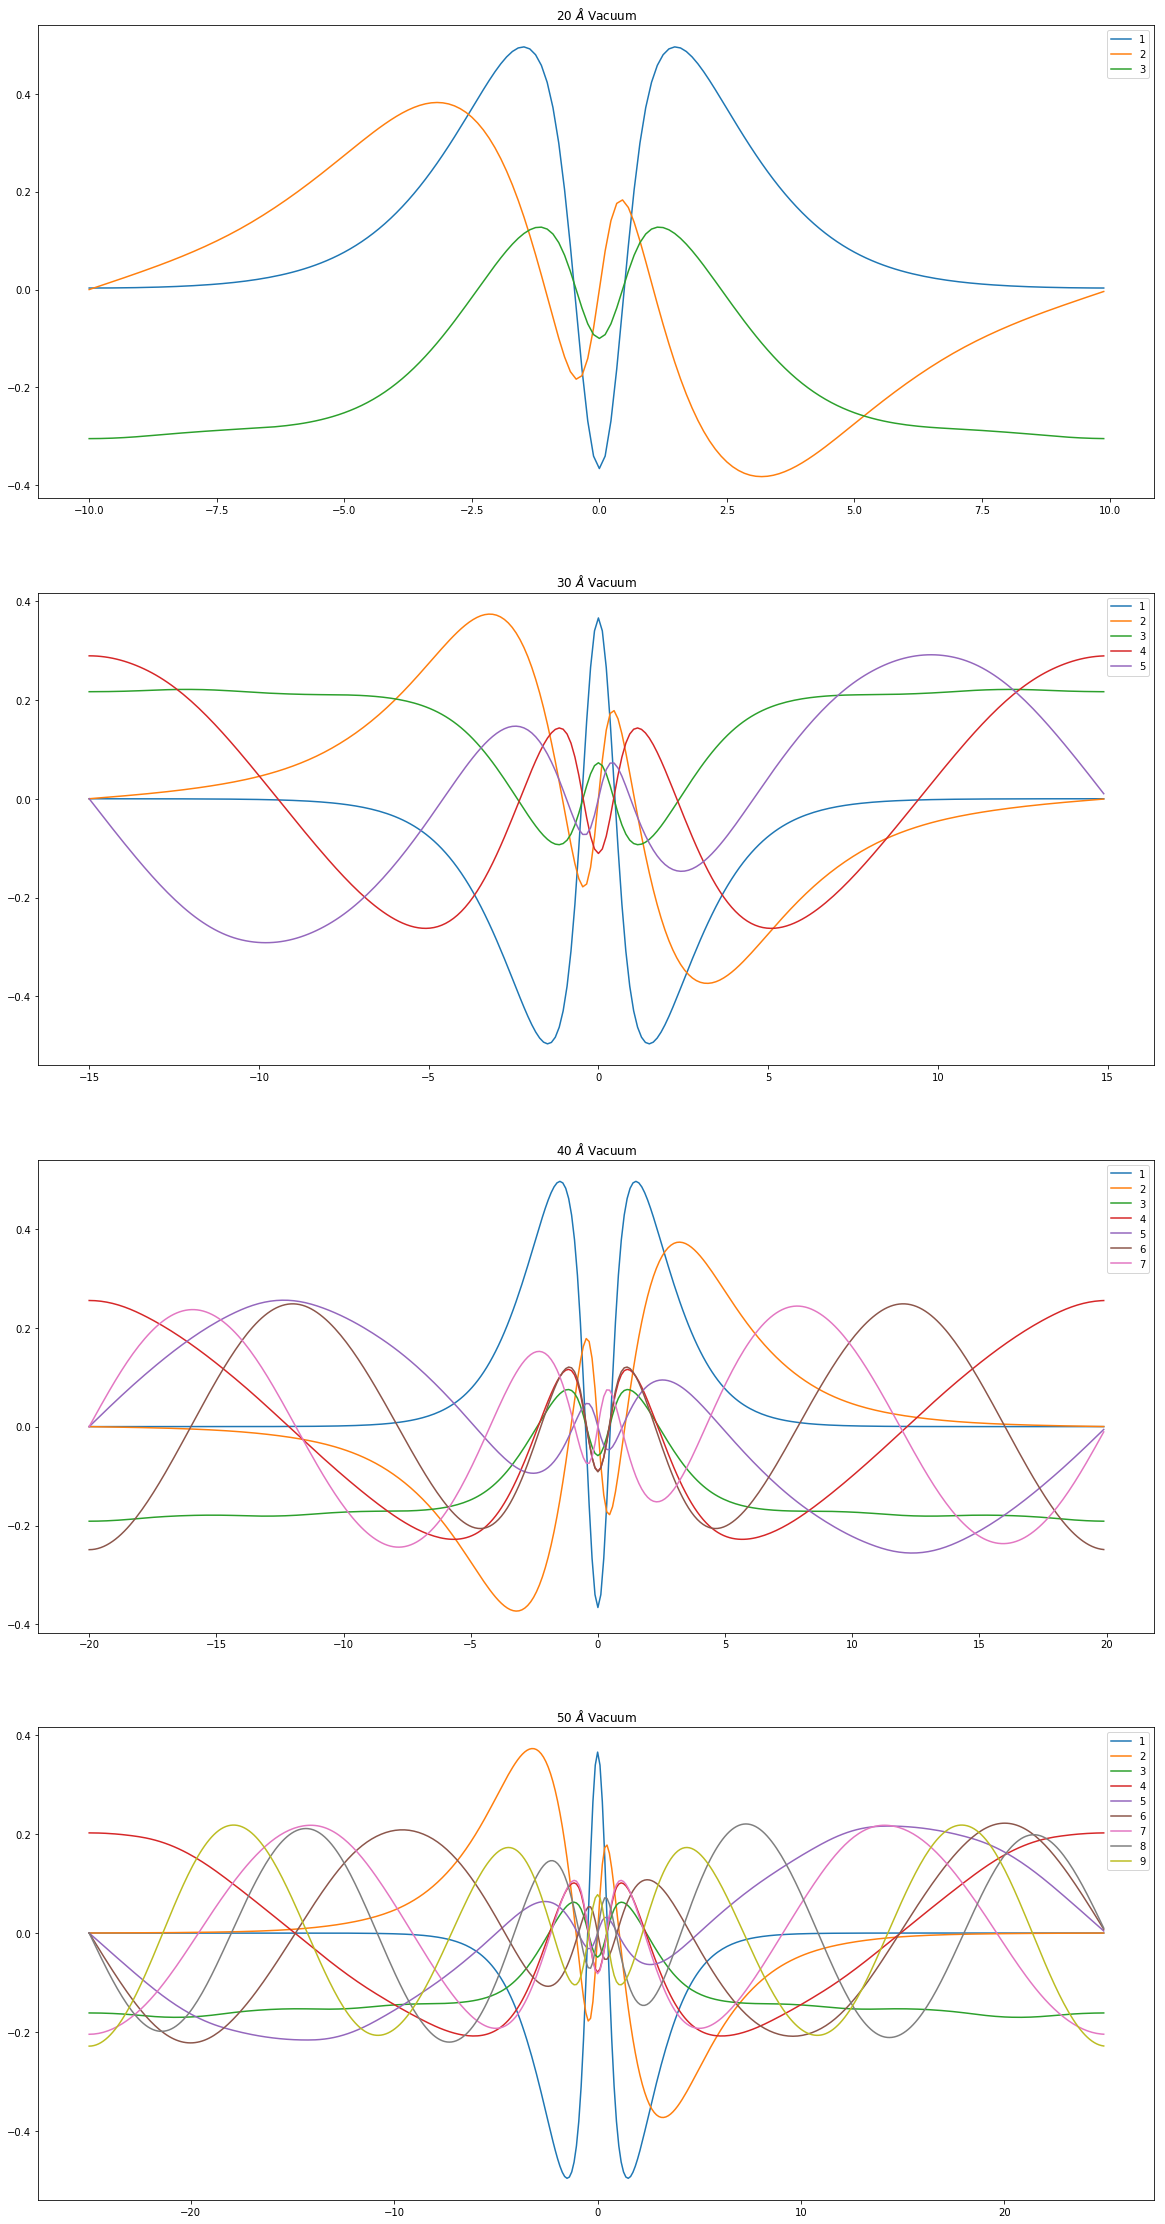

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
df=pd.read_excel('wavefunction-vacuum.xlsx')
eigs20=[-1.544656,0.33068,0.841201]
eigs30=[-1.836088,0.026329,0.544975,0.84735,0.869267]
eigs40=[-1.9818,-0.119781,0.396856,0.541801,0.555821,.950285,0.987376]
eigs50=[-2.069292,-0.207372,0.306747,0.393029,0.397359,0.645815,0.650304,1.043378,1.057353]

waves20=[]
waves30=[]
waves40=[]
waves50=[]

for i in range(1,5):
    waves20.append(np.array(df.iloc[0:176,i]))
for i in range(7,13):
    waves30.append(np.array(df.iloc[0:260,i]))
for i in range(15,23):
    waves40.append(np.array(df.iloc[0:348,i]))
for i in range(25,35):
    waves50.append(np.array(df.iloc[0:432,i]))
    
waves20=np.array(waves20)
waves30=np.array(waves30)
waves40=np.array(waves40)
waves50=np.array(waves50)

waves20[0]-=10
waves30[0]-=15
waves40[0]-=20
waves50[0]-=25


    
for i in range(len(waves20)-1):
    waves20[i+1]/=np.sqrt(simps(waves20[i+1]**2,waves20[0]))
for i in range(len(waves30)-1):
    waves30[i+1]/=np.sqrt(simps(waves30[i+1]**2,waves30[0]))
for i in range(len(waves40)-1):
    waves40[i+1]/=np.sqrt(simps(waves40[i+1]**2,waves40[0]))
for i in range(len(waves50)-1):    
    waves50[i+1]/=np.sqrt(simps(waves50[i+1]**2,waves50[0]))
    
fig=plt.figure(figsize=(20,40))
ax1=fig.add_subplot(411)
ax2=fig.add_subplot(412)
ax3=fig.add_subplot(413)
ax4=fig.add_subplot(414)
for i in range(len(waves20)-1):
    ax1.plot(waves20[0],waves20[i+1],label=str(i+1))
for i in range(len(waves30)-1):
    ax2.plot(waves30[0],waves30[i+1],label=str(i+1))
for i in range(len(waves40)-1):
    ax3.plot(waves40[0],waves40[i+1],label=str(i+1))
for i in range(len(waves50)-1):
    ax4.plot(waves50[0],waves50[i+1],label=str(i+1))
    
ax1.set_title('20 $\AA$ Vacuum')
ax2.set_title('30 $\AA$ Vacuum')
ax3.set_title('40 $\AA$ Vacuum')
ax4.set_title('50 $\AA$ Vacuum')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

print("Xu Hui provided the exact values for the wavefunctions and eigenvalues. I used the VASP calculated solutions.")

plt.show()

    


In [5]:
from scipy.integrate import simps
from tabulate import tabulate
import numpy as np

def perturbation_calculator(waves,eigenvalues):
    N=len(waves)-1
    a=np.zeros([N,N])
    df=pd.DataFrame(a,index=range(1,N+1),columns=range(1,N+1))
    total=0
    for i in range(0,N-1):
        for j in range(i+1,N):
            df.iloc[i,j]=simps(waves[0]*waves[i+1]*waves[j+1],waves[0])**2/(eigenvalues[i]-eigenvalues[j])
            df.iloc[j,i]=df.iloc[i,j]
            total+=df.iloc[i,j]
    return [df,total]

results20=perturbation_calculator(waves20,eigs20)
results30=perturbation_calculator(waves30,eigs30)
results40=perturbation_calculator(waves40,eigs40)
results50=perturbation_calculator(waves50,eigs50)

print("Data is provided as square symmetric matrix of individually calcualted perturbation terms. The Coefficient is the sum of the upper triangle.\n")


print('20 ANGSTROM VACUUM\n ',tabulate(results20[0]),'\nCoefficient=',results20[1],'\n')
print('30 ANGSTROM VACUUM\n ',tabulate(results30[0]),'\nCoefficient=',results30[1],'\n')
print('40 ANGSTROM VACUUM\n ',tabulate(results40[0]),'\nCoefficient=',results40[1],'\n')
print('50 ANGSTROM VACUUM\n ',tabulate(results50[0]),'\nCoefficient=',results50[1],'\n')

            

Data is provided as square symmetric matrix of individually calcualted perturbation terms. The Coefficient is the sum of the upper triangle.

20 ANGSTROM VACUUM
  -  ------------  ---------  -------------
1   0             -2.00262   -4.80975e-07
2  -2.00262        0        -18.5587
3  -4.80975e-07  -18.5587     0
-  ------------  ---------  ------------- 
Coefficient= -20.56132103907813 

30 ANGSTROM VACUUM
  -  ------------  -------------  --------------  --------------  --------------
1   0             -1.96089        -2.11495e-10    -3.34604e-10    -0.0474377
2  -1.96089        0             -17.5299         -6.8829         -1.65283e-11
3  -2.11495e-10  -17.5299          0              -0.0385566    -207.632
4  -3.34604e-10   -6.8829         -0.0385566       0            -262.428
5  -0.0474377     -1.65283e-11  -207.632        -262.428           0
-  ------------  -------------  --------------  --------------  -------------- 
Coefficient= -496.5196262421616 

40 ANGSTROM VACUUM
  -